In [1]:
# Imports and MySQL connection

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import mysql.connector
import config
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = "Movie Project1")
cursor = cnx.cursor()
print(cnx)

In [2]:
query1 = ("""SELECT genre, AVG(ratings)
             FROM `Movie Project1`.Reviews
             JOIN `Movie Project1`.Genres USING (title)
             GROUP BY genre
             ORDER BY 2""")
cursor.execute(query1)
query1_result = cursor.fetchall()

In [3]:
query1_result

[('Horror', 5.9107382425525845),
 ('Rom-Com', 6.0986577072399575),
 ('3D', 6.582758636310182),
 ('Animation', 6.702727278796109),
 ('Gay/Lesbian', 6.951515125505852)]

In [4]:
genres = []
avg_ratings = []
for t in query1_result:
    genres.append(t[0])
    avg_ratings.append(t[1])

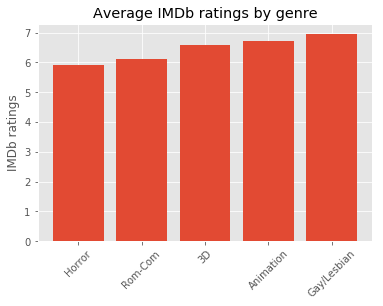

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(genres, avg_ratings)
ax.set_xticklabels(genres, rotation=45)
ax.set_ylabel("IMDb ratings")
ax.set_title("Average IMDb ratings by genre")
plt.show()

In [6]:
query2 = ("""SELECT title, ROUND((boxoffice-budget)/1000000, 1) AS profit_mil, ROUND((budget/1000000), 1) AS budget_mil, ratings
             FROM `Movie Project1`.Genres
             JOIN `Movie Project1`.Reviews USING (title)
             WHERE genre = '3D'
             ORDER BY title""")
cursor.execute(query2)
query2_result = cursor.fetchall()

In [7]:
query2_result

[('300: Rise of An Empire', -3.4, 110.0, 6.2),
 ('47 Ronin', -136.6, 175.0, 6.3),
 ('A Very Harold & Kumar 3D Christmas', 16.1, 19.0, 6.3),
 ('Abraham Lincoln: Vampire Hunter', -31.5, 69.0, 5.9),
 ('Alice Through the Looking Glass', -93.0, 170.0, 6.2),
 ('Alita: Battle Angel', -84.3, 170.0, 7.5),
 ('Alpha', -15.1, 51.0, 6.7),
 ('Ant-Man', 50.2, 130.0, 7.3),
 ("Assassin's Creed", -70.4, 125.0, 5.8),
 ('Avengers: Age of Ultron', 209.0, 250.0, 7.3),
 ('Avengers: Endgame', 500.7, 356.0, 8.7),
 ('Batman v Superman: Dawn of Justice', 80.4, 250.0, 6.5),
 ('Battle of the Year', -11.1, 20.0, 5.1),
 ('Big Hero 6', 57.5, 165.0, 7.8),
 ('Blade Runner 2049', -57.9, 150.0, 8.0),
 ('Brave', 52.3, 185.0, 7.1),
 ('Bumblebee', -7.8, 135.0, 6.9),
 ('Captain America: Civil War', 158.1, 250.0, 7.8),
 ('Captain America: The First Avenger', 36.7, 140.0, 6.9),
 ('Captain America: The Winter Soldier', 89.8, 170.0, 7.8),
 ('Captain Underpants: The First Epic Movie', 35.9, 38.0, 6.2),
 ('Cloudy with a Chance of 

In [8]:
profit_mil = []
budget_mil = []
ratings = []
for t in query2_result:
    profit_mil.append(t[1])
    budget_mil.append(t[2])
    ratings.append(t[3])

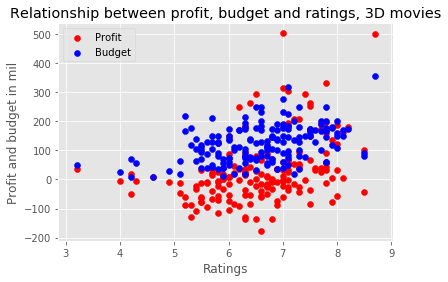

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(ratings, profit_mil, label="Profit", color ="r")
ax.scatter(ratings, budget_mil, label="Budget", color ="b")
ax.set_xlabel("Ratings")
ax.set_ylabel("Profit and budget in mil")
ax.set_title("Relationship between profit, budget and ratings, 3D movies")
ax.legend()
plt.show()

In [10]:
query3 = ("""SELECT title, ROUND((boxoffice-budget)/1000000, 1) AS profit_mil, ROUND((budget/1000000), 1) AS budget_mil, ratings
             FROM `Movie Project1`.Genres
             JOIN `Movie Project1`.Reviews USING (title)
             WHERE genre = 'Animation'
             ORDER BY title""")
cursor.execute(query3)
query3_result = cursor.fetchall()

In [11]:
query3_result

[('9', 1.7, 30.0, 7.1),
 ("A Bug's Life", 42.8, 120.0, 7.2),
 ('Aladdin', 189.4, 28.0, 8.0),
 ('Anomalisa', -4.2, 8.0, 7.3),
 ('Antz', -14.2, 105.0, 6.6),
 ('Aqua Teen Hunger Force Colon Movie Film for Theaters', 4.8, 0.8, 6.9),
 ('Arthur and the Invisibles', -70.9, 86.0, 6.0),
 ('Astro Boy', -45.4, 65.0, 6.3),
 ('Atlantis: The Lost Empire', -35.9, 120.0, 6.9),
 ('Beauty and the Beast', 194.0, 25.0, 8.0),
 ('Beavis and Butt-Head Do America', 51.1, 12.0, 6.8),
 ('Bee Movie', -23.4, 150.0, 6.1),
 ('Beowulf', -67.7, 150.0, 6.2),
 ('Bolt', -35.9, 150.0, 6.8),
 ('Cars', 124.1, 120.0, 7.1),
 ('Cars 2', -8.5, 200.0, 6.2),
 ('Chicken Little', -14.6, 150.0, 5.8),
 ('Chicken Run', 61.8, 45.0, 7.1),
 ('Cloudy with a Chance of Meatballs', 24.9, 100.0, 7.0),
 ('Coraline', 15.3, 60.0, 7.7),
 ('Curious George', 8.4, 50.0, 6.5),
 ('Delgo', -39.3, 40.0, 4.4),
 ('Despicable Me', 182.5, 69.0, 7.7),
 ('Digimon: The Movie', 4.6, 5.0, 6.0),
 ('Dinosaur', 10.2, 127.5, 6.5),
 ('Fantastic Mr. Fox', -19.0, 40.0

In [12]:
profit_mil = []
budget_mil = []
ratings = []
for t in query3_result:
    profit_mil.append(t[1])
    budget_mil.append(t[2])
    ratings.append(t[3])

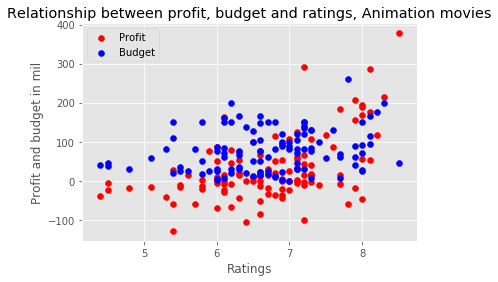

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(ratings, profit_mil, label="Profit", color ="r")
ax.scatter(ratings, budget_mil, label="Budget", color ="b")
ax.set_xlabel("Ratings")
ax.set_ylabel("Profit and budget in mil")
ax.set_title("Relationship between profit, budget and ratings, Animation movies")
ax.legend()
plt.show()

In [14]:
query4 = ("""SELECT title, ROUND((boxoffice-budget)/1000000, 1) AS profit_mil, ROUND((budget/1000000), 1) AS budget_mil, ratings
             FROM `Movie Project1`.Genres
             JOIN `Movie Project1`.Reviews USING (title)
             WHERE genre = 'Gay/Lesbian'
             ORDER BY title""")
cursor.execute(query4)
query4_result = cursor.fetchall()

In [15]:
query4_result

[('A Home at the End of the World', -5.5, 6.5, 6.7),
 ('A Single Man', 2.2, 7.0, 7.6),
 ('Alexander', -120.7, 155.0, 5.6),
 ('Bad Education', 0.2, 5.0, 7.5),
 ('Beginners', 2.6, 3.2, 7.2),
 ('Boat Trip', -11.4, 20.0, 4.9),
 ('Bohemian Rhapsody', 164.4, 52.0, 8.0),
 ("Boys Don't Cry", 9.5, 2.0, 7.6),
 ('Brokeback Mountain', 69.0, 14.0, 7.7),
 ('Capote', 21.8, 7.0, 7.4),
 ('Circumstance', -0.5, 1.0, 5.9),
 ('Dallas Buyers Club', 22.3, 5.0, 8.0),
 ('FAQs', -0.2, 0.2, 5.8),
 ('Far From Heaven', 2.4, 13.5, 7.4),
 ('Frida', 13.9, 12.0, 7.4),
 ('Gods and Monsters', -3.5, 10.0, 7.5),
 ('Happy, Texas', -0.5, 2.5, 6.3),
 ('Kinsey', -0.7, 11.0, 7.1),
 ('Kissing Jessica Stein', 6.0, 1.0, 6.6),
 ('Love, Simon', 23.8, 17.0, 7.6),
 ('Milk', 11.8, 20.0, 7.6),
 ('Monster', 26.5, 8.0, 7.3),
 ('Rent', -10.9, 40.0, 7.0),
 ('Tarnation', 0.6, 0.0, 7.2),
 ('That Man: Peter Berlin', -0.0, 0.1, 7.0),
 ('The Deep End', 5.8, 3.0, 6.6),
 ('The Dreamers', -12.5, 15.0, 7.2),
 ('The Hours', 16.7, 25.0, 7.6),
 ('The 

In [16]:
profit_mil = []
budget_mil = []
ratings = []
for t in query4_result:
    profit_mil.append(t[1])
    budget_mil.append(t[2])
    ratings.append(t[3])

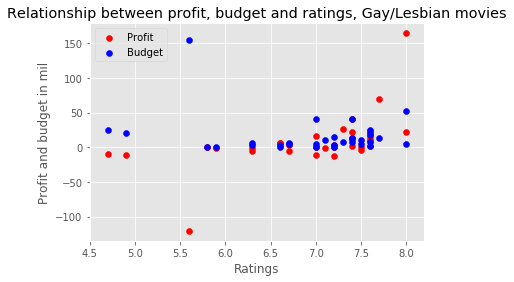

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(ratings, profit_mil, label="Profit", color ="r")
ax.scatter(ratings, budget_mil, label="Budget", color ="b")
ax.set_xlabel("Ratings")
ax.set_ylabel("Profit and budget in mil")
ax.set_title("Relationship between profit, budget and ratings, Gay/Lesbian movies")
ax.legend()
plt.show()

In [18]:
query5 = ("""SELECT title, ROUND((boxoffice-budget)/1000000, 1) AS profit_mil, ROUND((budget/1000000), 1) AS budget_mil, ratings
             FROM `Movie Project1`.Genres
             JOIN `Movie Project1`.Reviews USING (title)
             WHERE genre = 'Horror'
             ORDER BY title""")
cursor.execute(query5)
query5_result = cursor.fetchall()

In [19]:
query5_result

[('30 Days of Night', 9.6, 30.0, 6.6),
 ('A Cure for Wellness', -31.9, 40.0, 6.4),
 ('Alien: Covenant', -22.7, 97.0, 6.4),
 ('Alone in the Dark', -14.8, 20.0, 2.3),
 ('An American Werewolf in Paris', 1.6, 25.0, 5.1),
 ('Angel Heart', 0.2, 17.0, 7.3),
 ('Annabelle', 77.8, 6.5, 5.4),
 ('Annabelle: Creation', 87.1, 15.0, 6.5),
 ('Blade II', 28.3, 54.0, 6.7),
 ('Blade: Trinity', -12.6, 65.0, 5.9),
 ('Blair Witch', 15.8, 5.0, 5.0),
 ('Bless the Child', -35.6, 65.0, 5.1),
 ('BloodRayne', -22.6, 25.0, 2.9),
 ('Bones', -8.7, 16.0, 7.9),
 ('Book of Shadows: Blair Witch 2', 11.4, 15.0, 4.0),
 ("Bram Stoker's Dracula", 42.5, 40.0, 7.5),
 ('Bride of Chucky', 7.4, 25.0, 5.4),
 ('Cabin Fever', 19.7, 1.5, 5.6),
 ('Case 39', -12.7, 26.0, 6.2),
 ('Chain Letter', -2.9, 3.0, 4.2),
 ('Constantine', -24.0, 100.0, 7.0),
 ('Crimson Peak', -23.9, 55.0, 6.5),
 ('Dawn of the Dead', 33.0, 26.0, 7.3),
 ('Daybreakers', 10.1, 20.0, 6.5),
 ('Dead Silence', -3.2, 20.0, 6.2),
 ('Deep Blue Sea', 13.6, 60.0, 5.8),
 ('De

In [20]:
profit_mil = []
budget_mil = []
ratings = []
for t in query5_result:
    profit_mil.append(t[1])
    budget_mil.append(t[2])
    ratings.append(t[3])

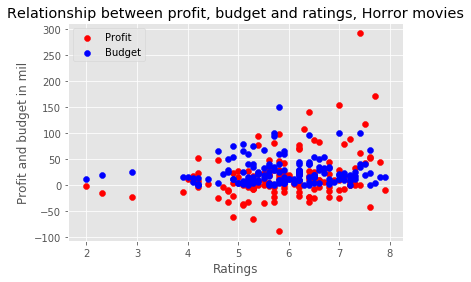

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(ratings, profit_mil, label="Profit", color ="r")
ax.scatter(ratings, budget_mil, label="Budget", color ="b")
ax.set_xlabel("Ratings")
ax.set_ylabel("Profit and budget in mil")
ax.set_title("Relationship between profit, budget and ratings, Horror movies")
ax.legend()
plt.show()

In [22]:
query6 = ("""SELECT title, ROUND((boxoffice-budget)/1000000, 1) AS profit_mil, ROUND((budget/1000000), 1) AS budget_mil, ratings
             FROM `Movie Project1`.Genres
             JOIN `Movie Project1`.Reviews USING (title)
             WHERE genre = 'Rom-Com'
             ORDER BY title""")
cursor.execute(query6)
query6_result = cursor.fetchall()

In [23]:
query6_result

[('10 Things I Hate About You', 8.2, 30.0, 7.3),
 ('27 Dresses', 46.8, 30.0, 6.1),
 ('50 First Dates', 45.9, 75.0, 6.8),
 ('A Good Year', -27.5, 35.0, 7.0),
 ('A Guy Thing', -4.5, 20.0, 5.6),
 ('A Lot Like Love', -8.2, 30.0, 6.6),
 ("A Midsummer Night's Dream", 5.1, 11.0, 6.4),
 ('About a Boy', 11.4, 30.0, 7.1),
 ('Along Came Polly', 46.1, 42.0, 5.9),
 ("America's Sweethearts", 47.6, 46.0, 5.7),
 ('Anything Else', -14.8, 18.0, 6.4),
 ('As Good as It Gets', 98.5, 50.0, 7.7),
 ('Bewitched', -21.7, 85.0, 4.8),
 ('Bigger Than the Sky', -0.7, 0.8, 6.1),
 ('Blast from the Past', -8.5, 35.0, 6.6),
 ('Blended', 6.3, 40.0, 6.5),
 ('Boomerang', 28.1, 42.0, 5.5),
 ('Boys and Girls', -13.2, 35.0, 5.4),
 ("Breakin' All the Rules", 2.3, 10.0, 5.6),
 ('Bridget Jones: The Edge of Reason', 0.2, 40.0, 6.0),
 ("Bridget Jones's Baby", -10.7, 35.0, 6.5),
 ("Bridget Jones's Diary", 46.5, 25.0, 6.7),
 ('Bringing Down the House', 99.7, 33.0, 5.6),
 ('Brown Sugar', 19.4, 8.0, 6.5),
 ('Chasing Liberty', -10.8, 

In [24]:
profit_mil = []
budget_mil = []
ratings = []
for t in query6_result:
    profit_mil.append(t[1])
    budget_mil.append(t[2])
    ratings.append(t[3])

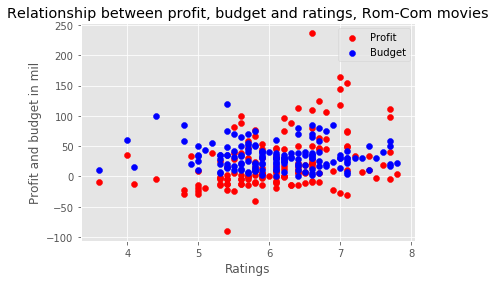

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(ratings, profit_mil, label="Profit", color ="r")
ax.scatter(ratings, budget_mil, label="Budget", color ="b")
ax.set_xlabel("Ratings")
ax.set_ylabel("Profit and budget in mil")
ax.set_title("Relationship between profit, budget and ratings, Rom-Com movies")
ax.legend()
plt.show()

In [10]:
query7 = ("""SELECT genre, ROUND(AVG(ratings), 1) AS rat, ROUND(AVG(boxoffice/1000000), 1) AS bo, ROUND(AVG(budget/1000000), 1) AS bu, (ROUND(AVG(boxoffice/1000000), 1)+ROUND(AVG(budget/1000000), 1)) AS prof FROM `Movie Project1`.Reviews
             JOIN `Movie Project1`.Genres USING (title)
             GROUP BY genre""")
cursor.execute(query7)
query7_result = cursor.fetchall()

In [11]:
query7_result

[('Rom-Com', 6.1, Decimal('55.6'), 32.8, 88.4),
 ('Horror', 5.9, Decimal('42.4'), 25.7, 68.1),
 ('3D', 6.6, Decimal('149.9'), 122.9, 272.8),
 ('Animation', 6.7, Decimal('108.6'), 77.7, 186.3),
 ('Gay/Lesbian', 7.0, Decimal('24.6'), 16.2, 40.8)]

In [12]:
genres = []
avg_boxoffice = []
avg_budget = []
for t in query7_result:
    genres.append(t[0])
    avg_boxoffice.append(t[2])
    avg_budget.append(t[3])

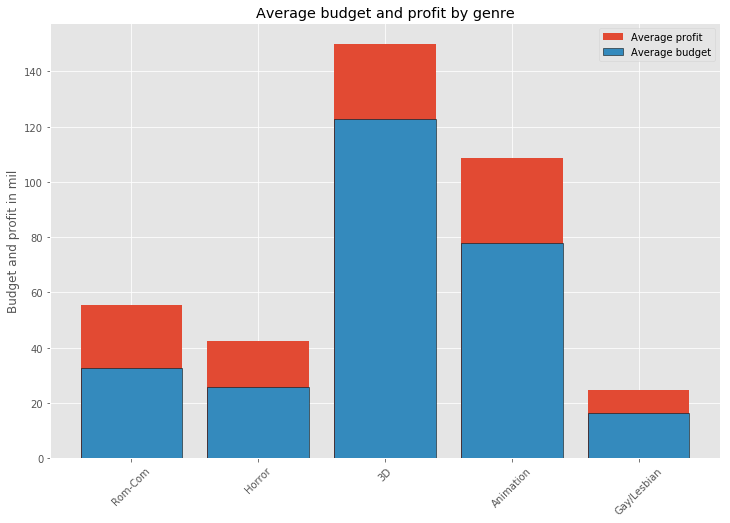

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(genres, avg_boxoffice, label="Average profit")
ax.bar(genres, avg_budget, edgecolor="black", label="Average budget")
ax.set_xticklabels(genres, rotation=45)
ax.set_ylabel("Budget and profit in mil")
ax.set_title("Average budget and profit by genre")
ax.legend()
plt.show()
# fig.savefig("budget_profit_by_genre.png", bbox_inches="tight")

In [14]:
query8 = ("""SELECT title, ROUND((boxoffice-budget)/1000000, 1) AS profit_mil, ratings
             FROM `Movie Project1`.Genres
             JOIN `Movie Project1`.Reviews USING (title)
             ORDER BY title""")
cursor.execute(query8)
query8_result = cursor.fetchall()

In [15]:
query8_result

[('10 Things I Hate About You', 8.2, 7.3),
 ('27 Dresses', 46.8, 6.1),
 ('30 Days of Night', 9.6, 6.6),
 ('300: Rise of An Empire', -3.4, 6.2),
 ('47 Ronin', -136.6, 6.3),
 ('50 First Dates', 45.9, 6.8),
 ('9', 1.7, 7.1),
 ("A Bug's Life", 42.8, 7.2),
 ('A Cure for Wellness', -31.9, 6.4),
 ('A Good Year', -27.5, 7.0),
 ('A Guy Thing', -4.5, 5.6),
 ('A Home at the End of the World', -5.5, 6.7),
 ('A Lot Like Love', -8.2, 6.6),
 ("A Midsummer Night's Dream", 5.1, 6.4),
 ('A Single Man', 2.2, 7.6),
 ('A Very Harold & Kumar 3D Christmas', 16.1, 6.3),
 ('About a Boy', 11.4, 7.1),
 ('Abraham Lincoln: Vampire Hunter', -31.5, 5.9),
 ('Aladdin', 189.4, 8.0),
 ('Alexander', -120.7, 5.6),
 ('Alice Through the Looking Glass', -93.0, 6.2),
 ('Alien: Covenant', -22.7, 6.4),
 ('Alita: Battle Angel', -84.3, 7.5),
 ('Alone in the Dark', -14.8, 2.3),
 ('Along Came Polly', 46.1, 5.9),
 ('Alpha', -15.1, 6.7),
 ("America's Sweethearts", 47.6, 5.7),
 ('An American Werewolf in Paris', 1.6, 5.1),
 ('Angel Hea

In [16]:
profit_mil = []
ratings = []
for t in query8_result:
    profit_mil.append(t[1])
    ratings.append(t[2])

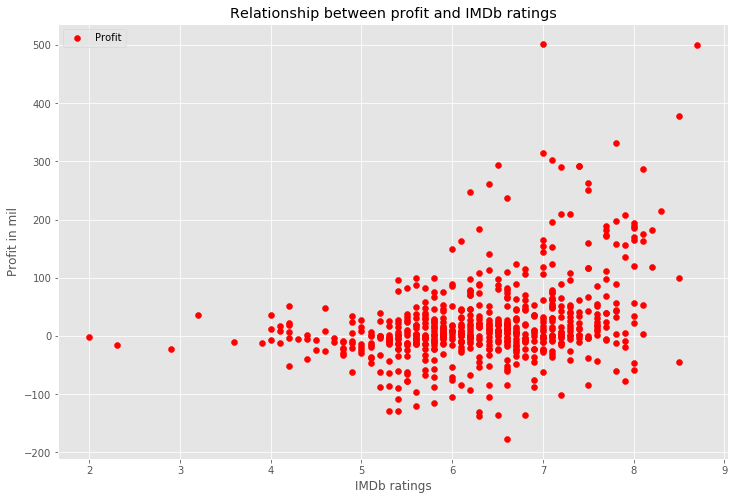

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(ratings, profit_mil, label="Profit", color ="r")
ax.set_xlabel("IMDb ratings")
ax.set_ylabel("Profit in mil")
ax.set_title("Relationship between profit and IMDb ratings")
ax.legend()
plt.show()
# fig.savefig("profit_ratings_relation.png", bbox_inches="tight")